In [3]:
#from google.colab import drive
#drive.mount('/content/drive')
import zipfile
import os
import shutil
import random
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import TensorBoard
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
#from google.colab import files
from IPython.display import Image
from keras.applications.vgg16 import VGG16
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [20]:
import urllib.request

url = "https://raw.githubusercontent.com/anikita/ImageNet_Pretrained_Autoencoder/master/autoencoder.py"
filename = "autoencoder.py"

try:
  urllib.request.urlretrieve(url, filename)
  print("Download successful!")
except Exception as e:
  print(f"Download failed: {e}")

Download successful!


In [75]:
path = './' #destination folder
zip_file = './state-farm-distracted-driver-detection.zip' #source file

In [76]:
#unzip the zip file state-farm-distracted-driver-detection.zip to its same directory located in ./content/drive/MyDrive/Datamining/

if os.path.exists(path + 'imgs'):
    print("The zip file has already been extracted")
else:
    zip_ref = zipfile.ZipFile(zip_file, 'r')
    zip_ref.extractall(path)
    zip_ref.close()

#delete the file driver_imgs_list.csv and sample_submission.csv
if os.path.exists(path + 'driver_imgs_list.csv'):
    os.remove(path + 'driver_imgs_list.csv')
if os.path.exists(path + 'sample_submission.csv'):
    os.remove(path + 'sample_submission.csv')
#delete the folder imgs/test and its images
if os.path.exists(path + 'imgs/test'):
    shutil.rmtree(path + 'imgs/test')

The zip file has already been extracted


In [77]:
#make 2 directories named test and train in the content directory with the same folders that are in the train directory
if os.path.exists(path + 'test'):
    print("The directories have already been created")
else:
    os.makedirs(path + 'test')
    os.makedirs(path + 'train')

    # Obtiene las carpetas dentro de 'train'
    folders = os.listdir(path + 'imgs/train')

    for folder in folders:
        os.makedirs(path + f'test/{folder}')
        os.makedirs(path + f'train/{folder}')

The directories have already been created


In [78]:
#for each c0-c9 folder in the train directory, move 80% of the images to the test directory randomly
#check if the content/imgs/train/c0 folder is empty
folders = os.listdir(path + 'imgs/train')
if len(os.listdir(path + 'imgs/train/c0')) != 0:
    for folder in folders:
        images = os.listdir(path + f'imgs/train/{folder}')
        random.shuffle(images)
        n = int(len(images) * 0.15)
        test_images = images[:n]
        for img in test_images:
            shutil.move(path + f'imgs/train/{folder}/{img}', path + f'test/{folder}/{img}')

    #move the remaining 20% of the images to the train directory
    for folder in folders:
        images = os.listdir(path + f'imgs/train/{folder}')
        random.shuffle(images)
        for img in images:
            shutil.move(path + f'imgs/train/{folder}/{img}', path + f'train/{folder}/{img}')
else:
    print("The images have already been moved")



The images have already been moved


In [79]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1, rotation_range=40, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(path + 'train', target_size=(96, 96), batch_size=125, class_mode='categorical', color_mode='rgb')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(path + 'test', target_size=(96, 96), class_mode='categorical', color_mode='rgb')

Found 19066 images belonging to 10 classes.
Found 3358 images belonging to 10 classes.


In [19]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import gzip

import keras
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Flatten,Dense
from keras.models import Model
from keras.optimizers import RMSprop, Adam
from keras.applications.vgg16 import VGG16
from autoencoder1234 import mymodel1
autoencoder = mymodel1()
autoencoder.summary()

#load the autoencoder model

'''
x = Flatten()(model.output)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = keras.models.Model(model.input, x)
model.summary()'''

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent (Conv2D)                 │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_50 (UpSampling2D) │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dblock5_conv1 (Conv2D)          │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dblock5_conv2 (Conv2D)          │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dblock5_conv3 (Conv2D)          │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_51 (UpSampling2D) │ (None, 28, 28, 512)    │             

 Total params: 34,111,555 (130.13 MB)

 Trainable params: 19,396,867 (73.99 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

FileNotFoundError: [Errno 2] No such file or directory: './train_imagenet.npy'

In [81]:
#train the model
opt = keras.optimizers.Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [82]:
model.fit(train_generator, steps_per_epoch=4, epochs=10)
results = model.evaluate(test_generator)

print(results)

Epoch 1/10


c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.0845 - loss: 2.8420
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.1651 - loss: 2.4582
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.1155 - loss: 2.3214
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.1768 - loss: 2.2305
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2376 - loss: 2.1792
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.1896 - loss: 2.1263
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2365 - loss: 2.1040
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2640 - loss: 2.0278
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3435 - loss: 1.9685
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3672 - loss: 1.8754
105/105 ━━━━━━━━━━━━━━━━━━━━ 48s 452ms/step - accuracy: 0.4105 - loss: 1.7150
[1.7132009267807007, 0.40291839838027954]


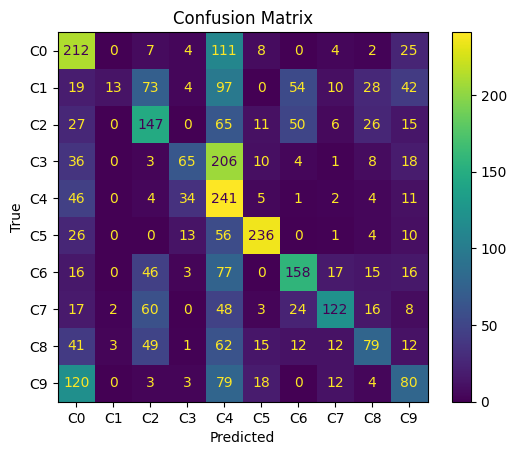

In [83]:
predictions = []
true_labels = []

# Iterate over each batch in the test generator
for i in range(len(test_generator)):
    # Get batch of data and labels and predict on it
    batch_data, batch_labels = test_generator[i]
    batch_predictions = model.predict(batch_data, verbose=0)
    # Append predictions and true labels
    predictions.extend(np.argmax(batch_predictions, axis=1))
    true_labels.extend(np.argmax(batch_labels, axis=1))

cm = confusion_matrix(true_labels, predictions)
labels = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [84]:
label_names = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind', 'hair and makeup', 'talking to passenger']
minimum_value = 0.78

import math

# We use the file insertion system of Colab

# Image path configuration
path = './hablar-por-telefono-en-el-coche.jpg'
# Preprocess the image
img = image.load_img(path, target_size=(96, 96))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Image transformation into a tensor
image_tensor = np.vstack([x])
#scale the tensor values between 0 and 1
image_tensor = image_tensor / 255.0

# Inference execution
classes = model.predict(image_tensor)

# Get the indices of top three classes
top_three_indices = np.argsort(classes[0])[::-1][:3]

# Print the top three classes and their probabilities
print("'Imagen is classified as:")
for i in top_three_indices:
    probability = math.trunc(classes[0][i]*1000000000)/1000000000
    print(f"   - {label_names[i]} with probability {probability}")

# If no class meets the threshold
if not any(classes[0][i] > minimum_value for i in range(len(classes[0]))):
    print('Image' + ' is not classified in any class.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
'Imagen is classified as:
   - talking on the phone - left with probability 0.275490999
   - talking on the phone - right with probability 0.19509463
   - texting - left with probability 0.120719991
Image is not classified in any class.
